# Day 08 — Fourier Series


**Learning Goal**: Understand Fourier coefficients and reconstruct periodic signals.

**Seasonal Hook**: Decomposing jingle bell melodies into pure tones.


### Story Spark
- **Intro**: The bell choir decomposes jingles into pure tones to balance harmonies across the village.
- **Gossip**: Percussion elves claim Rudolph autotunes himself by humming only the strongest frequency component.
- **Narration Tips**: Describe waveform sampling as catching snowflakes mid-air, then reveal how partial sums rebuild the melody like layering choir voices.

### Experiment Game Plan
- **Outline**: Sample a holiday tune waveform, compute coefficients numerically, and visualize partial sums using `numpy` and `matplotlib`.
- **Diagram Goal**: Plots comparing original vs. reconstructed signals, plus coefficient bar charts.

### References & Resources
- [BetterExplained Fourier article](https://betterexplained.com/)
- [Khan Academy series](https://www.khanacademy.org/)
- [MIT 18.03 notes.](https://www.google.com/search?q=MIT%2018.03%20notes.)
- Story cues: BetterExplained for intuition, Khan Academy for practice, MIT notes for formal expansions.

### Shared Imports

In [1]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')

try:
    import ipywidgets as widgets
    from ipywidgets import interact, FloatSlider, IntSlider
except Exception as exc:
    widgets = None
    def interact(*args, **kwargs):
        print('ipywidgets unavailable; adjust parameters manually instead.')
    print('ipywidgets could not be loaded:', exc)

### Guided Experiments & Visuals
The following cell builds the math exploration plus the requested diagram.

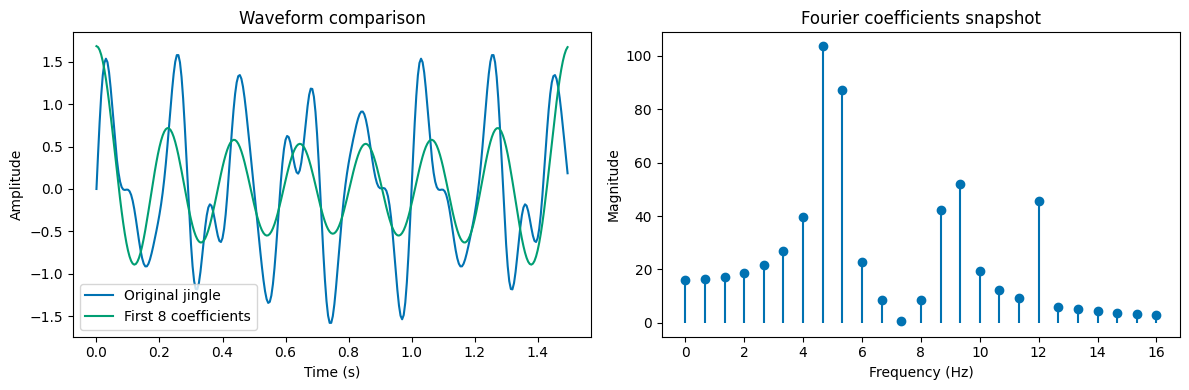

In [2]:

fs = 200
seconds = 1.5
t = np.linspace(0, seconds, int(fs * seconds), endpoint=False)
tune = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 9 * t) + 0.3 * np.sin(2 * np.pi * 12 * t)
coeffs = np.fft.rfft(tune)
frequencies = np.fft.rfftfreq(len(t), d=1/fs)

partial_sum = np.zeros_like(tune)
keep = 8
partial_coeffs = coeffs.copy()
partial_coeffs[keep:] = 0
partial_sum = np.fft.irfft(partial_coeffs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, tune, label='Original jingle')
plt.plot(t, partial_sum, label=f'First {keep} coefficients')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform comparison')

plt.subplot(1, 2, 2)
plt.stem(frequencies[:25], np.abs(coeffs)[:25], basefmt=' ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier coefficients snapshot')
plt.tight_layout()
plt.show()


### Final Hands-on Challenge
Record or synthesize a short festive waveform, approximate with first N terms, and evaluate reconstruction quality. "Prompt learners to capture a festive waveform, rebuild it with N terms, and report how close the reconstructed carol feels."

In [3]:

# 📌 Final Hands-on Task
# Record or synthesize a short festive waveform, approximate with first N terms, and evaluate reconstruction quality. "Prompt learners to capture a festive waveform, rebuild it with N terms, and report how close the reconstructed carol feels."

# Use the cells above as inspiration, then document your reasoning below.
# Feel free to add markdown, code, or even upload supporting images.
